<a href="https://colab.research.google.com/github/MEGHANASEEPANA/Datalabsteam-4/blob/jeswanth/random_forest_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
!git clone https://github.com/MEGHANASEEPANA/Datalabsteam-4.git

fatal: destination path 'Datalabsteam-4' already exists and is not an empty directory.


#Modules

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [110]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

#Loading Data

In [111]:
data=pd.read_csv("/content/Datalabsteam-4/train.csv/train.csv")

In [112]:
df=pd.DataFrame(data)

In [113]:
df.shape

(59381, 128)

In [114]:
df.head(3)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


#Description of Data

Id:	                A unique identifier associated with an application.

Product_Info_1-7	: A set of normalized variables relating to the product applied for

Ins_Age	:           Normalized age of applicant

Ht	:               Normalized height of applicant

Wt	:               Normalized weight of applicant

BMI	:               Normalized BMI of applicant

Employment_Info_1-6	: A set of normalized variables relating to the employment history of the applicant.

InsuredInfo_1-6	:    A set of normalized variables providing information about the applicant.

Insurance_History_1-9	: A set of normalized variables relating to the insurance history of the applicant.

Family_Hist_1-5	: A set of normalized variables relating to the family history of the applicant.

Medical_History_1-41	: A set of normalized variables relating to the medical history of the applicant.

Medical_Keyword_1-48	: A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.

Response	:         This is the target variable, an ordinal variable relating to the final decision associated with an application

In [115]:
data_types_dict = {column: df[column].dtype for column in df.columns}
print(data_types_dict)

{'Id': dtype('int64'), 'Product_Info_1': dtype('int64'), 'Product_Info_2': dtype('O'), 'Product_Info_3': dtype('int64'), 'Product_Info_4': dtype('float64'), 'Product_Info_5': dtype('int64'), 'Product_Info_6': dtype('int64'), 'Product_Info_7': dtype('int64'), 'Ins_Age': dtype('float64'), 'Ht': dtype('float64'), 'Wt': dtype('float64'), 'BMI': dtype('float64'), 'Employment_Info_1': dtype('float64'), 'Employment_Info_2': dtype('int64'), 'Employment_Info_3': dtype('int64'), 'Employment_Info_4': dtype('float64'), 'Employment_Info_5': dtype('int64'), 'Employment_Info_6': dtype('float64'), 'InsuredInfo_1': dtype('int64'), 'InsuredInfo_2': dtype('int64'), 'InsuredInfo_3': dtype('int64'), 'InsuredInfo_4': dtype('int64'), 'InsuredInfo_5': dtype('int64'), 'InsuredInfo_6': dtype('int64'), 'InsuredInfo_7': dtype('int64'), 'Insurance_History_1': dtype('int64'), 'Insurance_History_2': dtype('int64'), 'Insurance_History_3': dtype('int64'), 'Insurance_History_4': dtype('int64'), 'Insurance_History_5': d

#Data Exploration

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


Ignoring the index

In [117]:
df["Id"].duplicated().sum()

0

In [118]:
df['Id']=df.index+1
df.drop('Id',axis=1,inplace=True)

In [119]:
df.head(3)

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [120]:
df.describe(include='all')

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
unique,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

#Handling Missing Values

In [121]:
df.isnull().sum()

Product_Info_1             0
Product_Info_2             0
Product_Info_3             0
Product_Info_4             0
Product_Info_5             0
Product_Info_6             0
Product_Info_7             0
Ins_Age                    0
Ht                         0
Wt                         0
BMI                        0
Employment_Info_1         19
Employment_Info_2          0
Employment_Info_3          0
Employment_Info_4       6779
Employment_Info_5          0
Employment_Info_6      10854
InsuredInfo_1              0
InsuredInfo_2              0
InsuredInfo_3              0
InsuredInfo_4              0
InsuredInfo_5              0
InsuredInfo_6              0
InsuredInfo_7              0
Insurance_History_1        0
Insurance_History_2        0
Insurance_History_3        0
Insurance_History_4        0
Insurance_History_5    25396
Insurance_History_7        0
Insurance_History_8        0
Insurance_History_9        0
Family_Hist_1              0
Family_Hist_2          28656
Family_Hist_3 

In [122]:
null_col=df.isnull().sum()
columns_with_null = null_col[null_col > 0].index
description = df[columns_with_null].describe()

In [123]:
print(description)

       Employment_Info_1  Employment_Info_4  Employment_Info_6  \
count       59362.000000       52602.000000       48527.000000   
mean            0.077582           0.006283           0.361469   
std             0.082347           0.032816           0.349551   
min             0.000000           0.000000           0.000000   
25%             0.035000           0.000000           0.060000   
50%             0.060000           0.000000           0.250000   
75%             0.100000           0.000000           0.550000   
max             1.000000           1.000000           1.000000   

       Insurance_History_5  Family_Hist_2  Family_Hist_3  Family_Hist_4  \
count         33985.000000   30725.000000   25140.000000   40197.000000   
mean              0.001733       0.474550       0.497737       0.444890   
std               0.007338       0.154959       0.140187       0.163012   
min               0.000000       0.000000       0.000000       0.000000   
25%               0.000400    

In [124]:
percentage_null = (null_col / len(df)) * 100
percentage_null = percentage_null[columns_with_null]
percentage_null.name = 'Percentage of Null Values'
print(percentage_null)

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
Name: Percentage of Null Values, dtype: float64


In [125]:
#dropping columns with more than 40% missing values
threshold = 0.4 * len(df)
non_col = df.columns[df.isnull().sum() > threshold]
df.drop(non_col, axis=1, inplace=True)
print(non_col)

Index(['Insurance_History_5', 'Family_Hist_2', 'Family_Hist_3',
       'Family_Hist_5', 'Medical_History_10', 'Medical_History_15',
       'Medical_History_24', 'Medical_History_32'],
      dtype='object')


##handling rest missing values

In [126]:
null_col=df.isnull().sum()
cols_to_impute = null_col[null_col > 0].index
description = df[cols_to_impute].describe()

In [127]:
print(description)

       Employment_Info_1  Employment_Info_4  Employment_Info_6  Family_Hist_4  \
count       59362.000000       52602.000000       48527.000000   40197.000000   
mean            0.077582           0.006283           0.361469       0.444890   
std             0.082347           0.032816           0.349551       0.163012   
min             0.000000           0.000000           0.000000       0.000000   
25%             0.035000           0.000000           0.060000       0.323944   
50%             0.060000           0.000000           0.250000       0.422535   
75%             0.100000           0.000000           0.550000       0.563380   
max             1.000000           1.000000           1.000000       0.943662   

       Medical_History_1  
count       50492.000000  
mean            7.962172  
std            13.027697  
min             0.000000  
25%             2.000000  
50%             4.000000  
75%             9.000000  
max           240.000000  


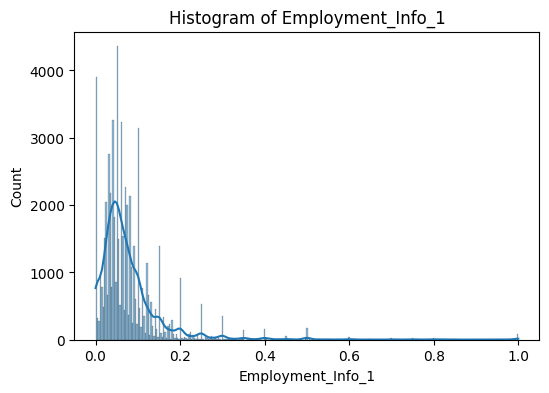

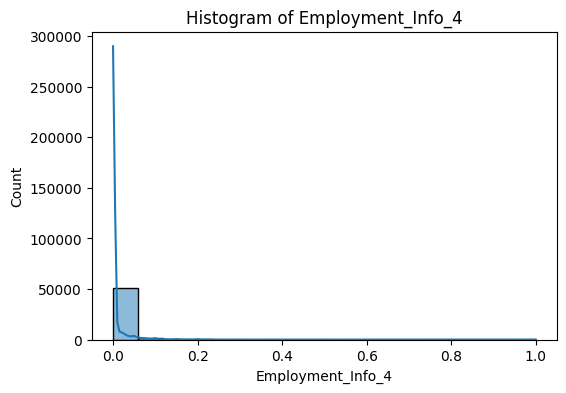

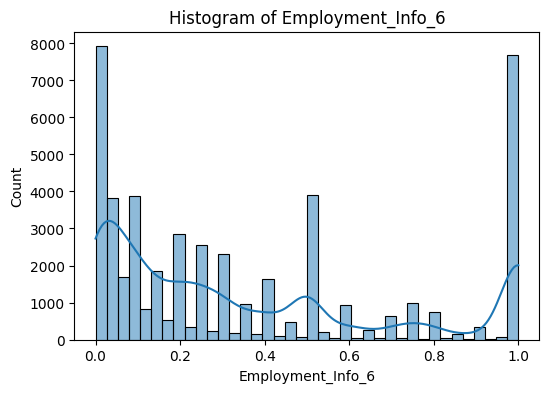

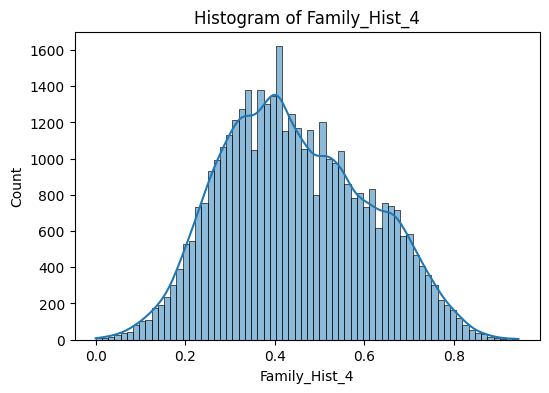

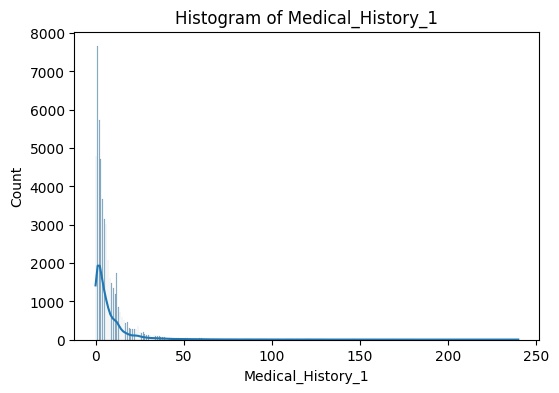

In [128]:
req_cols=['Employment_Info_1','Employment_Info_4','Employment_Info_6','Family_Hist_4','Medical_History_1']
for column in req_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.show()

In [129]:
df[['Employment_Info_6','Family_Hist_4']]=df[['Employment_Info_6','Family_Hist_4']].fillna(df[['Employment_Info_6','Family_Hist_4']].mean())

In [130]:
#since they are Distributive Functions(Continuous variable),
#graph is right-skewed,
#we use median
df[req_cols]=df[req_cols].fillna(df[req_cols].median())
df.isnull().sum()

Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0
Medical_History_7      0


In [131]:
df.isnull().sum()

Product_Info_1         0
Product_Info_2         0
Product_Info_3         0
Product_Info_4         0
Product_Info_5         0
Product_Info_6         0
Product_Info_7         0
Ins_Age                0
Ht                     0
Wt                     0
BMI                    0
Employment_Info_1      0
Employment_Info_2      0
Employment_Info_3      0
Employment_Info_4      0
Employment_Info_5      0
Employment_Info_6      0
InsuredInfo_1          0
InsuredInfo_2          0
InsuredInfo_3          0
InsuredInfo_4          0
InsuredInfo_5          0
InsuredInfo_6          0
InsuredInfo_7          0
Insurance_History_1    0
Insurance_History_2    0
Insurance_History_3    0
Insurance_History_4    0
Insurance_History_7    0
Insurance_History_8    0
Insurance_History_9    0
Family_Hist_1          0
Family_Hist_4          0
Medical_History_1      0
Medical_History_2      0
Medical_History_3      0
Medical_History_4      0
Medical_History_5      0
Medical_History_6      0
Medical_History_7      0


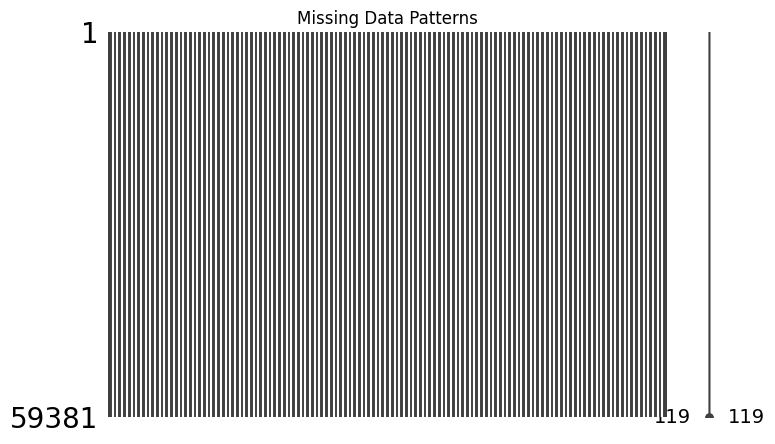

In [132]:
import missingno as msno
msno.matrix(df, figsize=(8, 5))  # Blue color for missing values
plt.title('Missing Data Patterns')
plt.show()

#distribution of the target variable

<Axes: xlabel='Response', ylabel='count'>

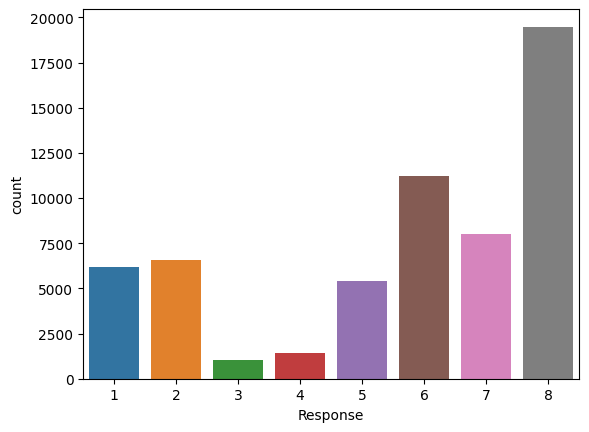

In [135]:
sns.countplot(x=df['Response'])


In [136]:
print(df['Response'].value_counts())

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64


In [137]:
df['Modified_Response']  = df['Response'].apply(lambda x : 1 if x<=5 and x>=0 else (2 if x<=7 else 3))

<Axes: xlabel='Modified_Response', ylabel='count'>

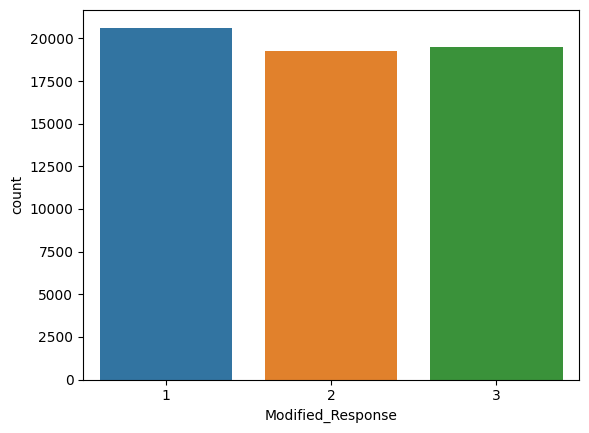

In [138]:
sns.countplot(x=df['Modified_Response'])

#Feature Engineering

### categorizing variables
**The following variables are continuous:**

Product_Info_4, Ins_Age, Ht, Wt, BMI, Employment_Info_1, Employment_Info_4, Employment_Info_6, Insurance_History_5, Family_Hist_2, Family_Hist_3, Family_Hist_4, Family_Hist_5

**The following variables are discrete:**

Medical_History_1, Medical_History_10, Medical_History_15, Medical_History_24, Medical_History_32

Medical_Keyword_1-48 are **dummy variables.**

rest are categorical(**nominal variables**)




#Feature Variables

##Label Encoding Product_Info_2

In [139]:
Lab=LabelEncoder()
df['Product_Info_2']=Lab.fit_transform(df['Product_Info_2'])
df['Product_Info_2']+=1

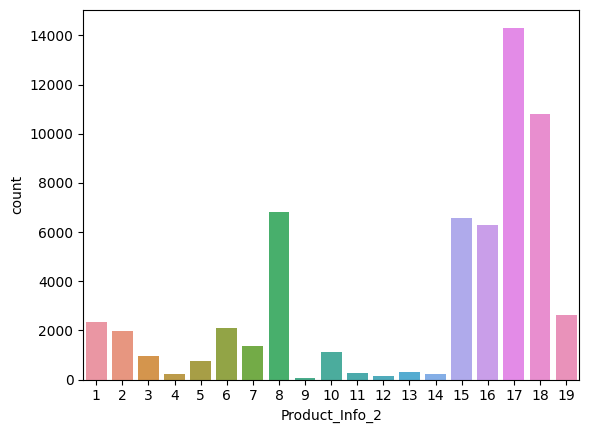

In [140]:
sns.countplot(x='Product_Info_2', data=df)
plt.show()

##physical_data

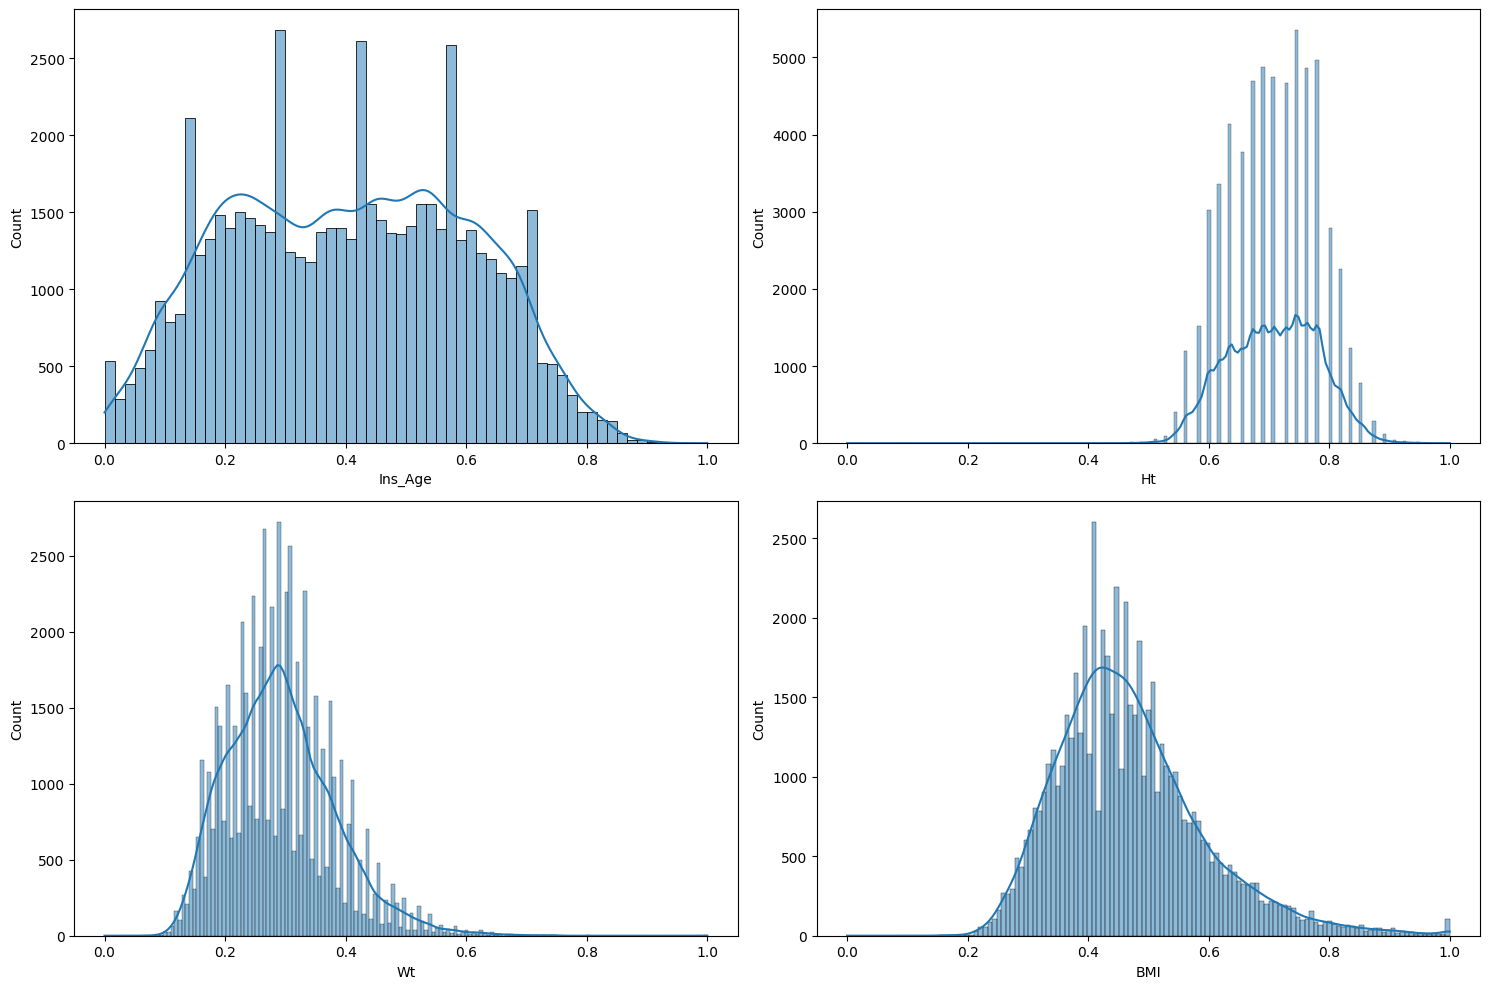

In [141]:
physical_data = ['Ins_Age', 'Ht', 'Wt', 'BMI']
plt.figure(figsize=(15, 10))
for idx, col in enumerate(physical_data, 1):
    plt.subplot(2, 2, idx)
    sns.histplot( x=col,data=df, kde=True)
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [142]:
df[physical_data].corr()

,Ins_Age,Ht,Wt,BMI
Ins_Age,1.000000,0.008419,0.110366,0.137076
Ht,0.008419,1.000000,0.610425,0.123125
Wt,0.110366,0.610425,1.000000,0.854083
BMI,0.137076,0.123125,0.854083,1.000000


In [143]:
df.drop(['Ht','Wt'],axis=1,inplace=True)
#based on domain analysis

In [145]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Modified_Response
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,3


In [146]:
df.shape

(59381, 118)

#Splitting the Data

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [163]:
# Assuming 'train' DataFrame contains features and target variable
# Extract features and target variable
X = df.drop('Response', axis=1)  # Replace 'target_variable' with the actual column name
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [165]:
print(X_train.shape,X_test.shape)

(47504, 117) (11877, 117)


In [166]:
print(y_train.shape,y_test.shape)

(47504,) (11877,)


#random forest model

In [150]:

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.52      0.52      1285
           2       0.45      0.50      0.47      1309
           3       0.26      0.03      0.05       202
           4       0.54      0.49      0.51       278
           5       0.61      0.63      0.62      1108
           6       0.75      0.80      0.77      2250
           7       0.68      0.60      0.64      1540
           8       1.00      1.00      1.00      3905

    accuracy                           0.74     11877
   macro avg       0.60      0.57      0.57     11877
weighted avg       0.74      0.74      0.74     11877



In [76]:
from sklearn.metrics import cohen_kappa_score

# Calculated quadratic weighted kappa
weighted_kappa = cohen_kappa_score(y_test, y_pred, weights='quadratic')

print(f'Quadratic Weighted Kappa: {weighted_kappa:.2f}')


Quadratic Weighted Kappa: 0.91


#HYPERPARAMETER TUNING

In [151]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt'],
    'bootstrap': [True]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1,verbose=1)

# Fit the model to the data
grid_search.fit(X_train, y_train)
# Training the model on the resampled data
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.7421907889197609
Classification Report:
              precision    recall  f1-score   support

           1       0.52      0.50      0.51      1285
           2       0.45      0.50      0.48      1309
           3       0.50      0.02      0.04       202
           4       0.60      0.42      0.49       278
           5       0.60      0.66      0.63      1108
           6       0.73      0.79      0.76      2250
           7       0.67      0.64      0.66      1540
           8       1.00      1.00      1.00      3905

    accuracy                           0.74     11877
   macro avg       0.64      0.57      0.57     11877
weighted avg       0.74      0.74      0.74     11877



**class 3**: The model has difficulty predicting this class, as indicated by the low precision, recall, and F1-score.


**Overall**: The model seems to perform well for some classes but struggles with others, especially class 3. Further analysis, feature engineering, or model tuning might be needed to improve performance, especially for the minority classes.

#RESAMPLING USING SMOTE

In [93]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [152]:
X_train.shape

(47504, 117)

In [153]:
X_test.shape

(11877, 117)

In [157]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [158]:
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Class distribution before SMOTE:
8    15584
6     8983
7     6487
2     5243
1     4922
5     4324
4     1150
3      811
Name: Response, dtype: int64

Class distribution after SMOTE:
6    15584
3    15584
5    15584
8    15584
7    15584
1    15584
2    15584
4    15584
Name: Response, dtype: int64


#RETRAINING

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# Split the resampled data into training and testing sets

In [159]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model on the resampled data
rf_classifier.fit(X_train_resampled, y_train_resampled)

#predictions on the test set
y_pred_smote = rf_classifier.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))

Accuracy: 0.7421907889197609

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.51      0.50      1285
           2       0.45      0.42      0.43      1309
           3       0.29      0.15      0.20       202
           4       0.48      0.55      0.52       278
           5       0.59      0.64      0.61      1108
           6       0.76      0.76      0.76      2250
           7       0.66      0.66      0.66      1540
           8       1.00      1.00      1.00      3905

    accuracy                           0.73     11877
   macro avg       0.59      0.59      0.58     11877
weighted avg       0.73      0.73      0.73     11877



In [160]:
print("Accuracy:", accuracy_score(y_test, y_pred_smote))

Accuracy: 0.7348657068283236


**Class 3 Improvement**: The recall for class 3 has improved, but it's still relatively low. Further investigation and feature engineering may be needed to better capture this class.

**Balanced Precision and Recall:** The precision and recall values for many classes are more balanced, indicating that the model is making fewer false positives and false negatives.

**Macro and Weighted Averages**: The macro and weighted averages for precision, recall, and F1-score are also improved, indicating an overall enhancement in model performance.

**Accuracy**: The accuracy has slightly decreased, which is expected when dealing with imbalanced classes. However, the overall performance, especially for minority classes, has likely improved

#HYPERTUNING

In [161]:
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt'],
    'bootstrap': [True]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1,verbose=1)

# Fit the model to the data
grid_search.fit(X_train_resampled, y_train_resampled)
# Training the model on the resampled data
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict using the best model
y_pred_smote_tuned = grid_search.predict(X_test)

# Evaluate the model
print("\nTuned Model Performance:")
accuracy = accuracy_score(y_test, y_pred_smote_tuned)
print("Accuracy:", accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred_smote_tuned))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Tuned Model Performance:
Accuracy: 0.7386545423928601
Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.50      0.51      1285
           2       0.48      0.42      0.45      1309
           3       0.26      0.18      0.21       202
           4       0.45      0.63      0.53       278
           5       0.58      0.65      0.61      1108
           6       0.78      0.74      0.76      2250
           7       0.65      0.69      0.67      1540
           8       1.00      1.00      1.00      3905

    accuracy                           0.74     11877
   macro avg       0.59      0.60      0.59     11877
weighted avg       0.74      0.74      0.74     11877



After experimenting with hyperparameter tuning, we can see that there is still neccessary for improvements. and

consider additional feature engineering to further enhance its performance

#reducing dimensionality

In [162]:
df.shape

(59381, 118)

###general function to create a list of column names

In [ ]:
def func(string, num):
    ans = []
    for i in range(1, num + 1):
        ans.append(f'{string}_{i}')
    return ans

In [ ]:
Medical_Keywords = func('Medical_Keyword',48 )
print(Medical_Keywords)
#created a list of all medical keyword columns

['Medical_Keyword_1', 'Medical_Keyword_2', 'Medical_Keyword_3', 'Medical_Keyword_4', 'Medical_Keyword_5', 'Medical_Keyword_6', 'Medical_Keyword_7', 'Medical_Keyword_8', 'Medical_Keyword_9', 'Medical_Keyword_10', 'Medical_Keyword_11', 'Medical_Keyword_12', 'Medical_Keyword_13', 'Medical_Keyword_14', 'Medical_Keyword_15', 'Medical_Keyword_16', 'Medical_Keyword_17', 'Medical_Keyword_18', 'Medical_Keyword_19', 'Medical_Keyword_20', 'Medical_Keyword_21', 'Medical_Keyword_22', 'Medical_Keyword_23', 'Medical_Keyword_24', 'Medical_Keyword_25', 'Medical_Keyword_26', 'Medical_Keyword_27', 'Medical_Keyword_28', 'Medical_Keyword_29', 'Medical_Keyword_30', 'Medical_Keyword_31', 'Medical_Keyword_32', 'Medical_Keyword_33', 'Medical_Keyword_34', 'Medical_Keyword_35', 'Medical_Keyword_36', 'Medical_Keyword_37', 'Medical_Keyword_38', 'Medical_Keyword_39', 'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42', 'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45', 'Medical_Keyword_4

In [ ]:
df.shape

(59381, 118)

###Merging Medical_Keyword Columns

In [ ]:
# df['Medical_Words']=df['Medical']
df['Medical_Words'] = df[Medical_Keywords].sum(axis=1)

In [ ]:
df.shape
df_merged=df.drop(Medical_Keywords,axis=1)
df_merged.shape

(59381, 71)

In [ ]:
df_merged['Medical_Words'].value_counts()

0     23519
1     16096
2      9464
3      5235
4      2726
5      1311
6       587
7       273
8        92
9        52
10       19
11        3
14        1
13        1
12        1
16        1
Name: Medical_Words, dtype: int64

In [ ]:
df_merged['Medical_Words'].describe()

count    59381.000000
mean         1.264765
std          1.480236
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Medical_Words, dtype: float64

##One hot Encoding Medical_History

In [ ]:
df['Medical_History_12'].unique()

array([2, 3, 1])

In [ ]:
Medical_Histories = func('Medical_History',41)
to_remove=['Medical_History_1','Medical_History_2','Medical_History_10','Medical_History_15','Medical_History_24','Medical_History_32']
Medical_Histories = [item for item in Medical_Histories if item not in to_remove]

In [ ]:
df_merged.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Response,Modified_Response,Medical_Words
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,2,1,1,3,2,2,1,3,2,3,3,3,3,1,1,2,1,2,3,1,3,3,1,3,2,3,1,3,1,2,2,1,3,3,3,8,3,0
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,2,1,1,3,2,2,1,3,2,3,3,1,3,1,1,2,1,2,3,1,3,3,1,3,2,3,3,1,1,2,2,1,3,3,1,4,1,0
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,8,3,0
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,2,2,3,1,3,3,1,3,2,3,3,3,1,2,2,1,3,3,1,8,3,1
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,2,2,1,3,2,2,2,3,2,3,3,1,3,1,1,2,1,2,3,2,2,3,1,3,2,3,3,3,1,3,2,1,3,3,1,8,3,0


In [ ]:
from sklearn.decomposition import PCA
columns_for_pca = Medical_Histories
df_pca_input = df_merged[columns_for_pca]

# Apply one-hot encoding to categorical columns
df_pca_encoded = pd.get_dummies(df_pca_input, columns=columns_for_pca)

# Apply PCA to reduce dimensionality to 1 column
pca = PCA(n_components=1)
df_merged['PCA_Component'] = pca.fit_transform(df_pca_encoded)

# Drop the columns that underwent PCA
df_encoded=df_merged.drop(columns=columns_for_pca)





In [ ]:
df_encoded.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_4,Medical_History_1,Medical_History_2,Response,Modified_Response,Medical_Words,PCA_Component
0,1,17,10,0.076923,2,1,1,0.641791,0.323008,0.028,12,1,0.0,3,0.361469,1,2,6,3,1,2,1,1,1,3,1,1,1,2,2,0.444890,4.0,112,8,3,0,-0.802699
1,1,1,26,0.076923,2,3,1,0.059701,0.272288,0.000,1,3,0.0,2,0.001800,1,2,6,3,1,2,1,2,1,3,1,1,3,2,2,0.084507,5.0,412,4,1,0,-0.529944
2,1,19,26,0.076923,2,3,1,0.029851,0.428780,0.030,9,1,0.0,2,0.030000,1,2,8,3,1,1,1,2,1,1,3,3,2,3,3,0.225352,10.0,3,8,3,0,2.157844
3,1,18,10,0.487179,2,3,1,0.164179,0.352438,0.042,9,1,0.0,3,0.200000,2,2,8,3,1,2,1,2,1,1,3,3,2,3,3,0.352113,0.0,350,8,3,1,-0.276400
4,1,16,26,0.230769,2,3,1,0.417910,0.424046,0.027,9,1,0.0,2,0.050000,1,2,6,3,1,2,1,2,1,1,3,3,2,3,2,0.408451,4.0,162,8,3,0,2.157844


In [ ]:
df_encoded.shape

(59381, 37)

In [ ]:

#Rest of the columns are with non-paramteric nature. So we can take all the rest columns.
#And can select the features again

#Normalization/Scaling

#1

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_encoded.drop(['Modified_Response','Response'],axis=1)
y = df_encoded['Modified_Response']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier - you can try other classifiers as well
# model = RandomForestClassifier(n_estimators=100, random_state=10)


model = RandomForestClassifier(
    n_estimators=500,
    max_features='sqrt',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the model
# model.fit(X_train, y_train)



# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6307148269765093
